# Single track model


## Introduction

The single-track model also called bicycle model is a simple yet useful representation of the behaviour of a (4-wheeled) vehicle. Fundamental quantities used to assess handling both in steady-state and transient conditions can be derived from this model, which is covered by most authors of vehicle dynamics.  
I particularly appreciate the clarity of the dedicated chapter in the book  [Vehicle Handling Dynamics](https://www.elsevier.com/books/vehicle-handling-dynamics/abe/978-0-08-100390-9) by Masato Abe.

But don't forget that it is a very simplified representation of a vehicle. As Massimo Guiggani writes in [The Science of Vehicle Dynamics](https://www.springer.com/gp/book/9789401776875) :
> Vehicle engineers should be well aware of the steps taken to simplify the model, and hence realize that in some cases the single track model may miss some crucial phenomena, and the double track model should be used instead


You can find great information online in the course given by Pierre Duysinx at University of Liège (Belgium), especially in [MECA0525](http://www.ingveh.ulg.ac.be/index.php?page=MECA0525).  
The most useful pdf to understand this single track model is 
[Vehicle dynamics 1](http://www.ingveh.ulg.ac.be/uploads/education/MECA0525/11_MECA0525_VEHDYN1_SSTURN_2020-2021.pdf), in which you can find some more details than those given in this notebook.  



## Symbols

```
L     wheelbase (m)
a     distance between the center of gravity G and the front axle (m)
b     distance between the center of gravity G and the rear axle (m)
m     mass of the vehicle (kg)
osr   overall steering ratio
R     radius of the turn (m)
V     tangent velocity (m/s)
ay    lateral acceleration (m/s^2)
δ     steering angle at the wheel (rad)
α     slip angle of the wheel (rad)
β     slip angle of the vehicle (rad)
```

Caution : in the above mentioned course P. Duysinx uses the variables `b` and `c` for the distances between the CoG and the axles. In this notebook I chose `a` and `b` instead, which is a more standard convention in reference books.



## Steady-state turning


### Low lateral acceleration

![bicycle_model_01.png](./images/bicycle_model_01.png)

The steering angle at very low lateral acceleration is called Ackermann angle `δ_ack` (french readers may use Jeantaud instead of Ackermann). We have from simple kinematic conditions :
```
tan(δ_ack) = L/R
```
and using the approximation for small angles it is often written
```
δ_ack = L/R
```


In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

# Vehicle data
a = 1.2  # m
b = 1.6  # m
m = 1500 # kg
osr = 15
L = a + b  # m

# Manoeuver data
R = 80   # m
V = 5    # m/s

rad2deg = 180/math.pi
g = 9.81 # m/s^2

ay = V**2 / R
δ_ack = math.atan(L/R)

# Caution : f-string  used here (only with Python 3.6+ - Switch to the older format function if required)

print()
print(f"{'Lateral acceleration':40} = {ay:.2f} m/s^2")
print(f"{'Ackermann angle at the wheel':40} = {δ_ack:.3f} rad.")
print(f"{'Angle at the steering wheel':40} = {δ_ack*osr*rad2deg:.1f} deg.")



Lateral acceleration                     = 0.31 m/s^2
Ackermann angle at the wheel             = 0.035 rad.
Angle at the steering wheel              = 30.1 deg.


### Increasing lateral acceleration

At higher lateral acceleration, a slip angle α appears between the plane of the wheel and its velocity vector.  

![bicycle_model_02.png](./images/bicycle_model_02.png)

The slip angle is related to the lateral force due to the acceleration and to the cornering stiffness of the tire (which depends on the vertical load, the camber angle, the tire pressure, etc ...). Most of the time the front and rear slip angles won't be equal, and the difference between them is a measure of the understeering or oversteering behavior of the vehicle. 

Let's show this, starting with the following notations :
```
αf     slip angle of the front wheel (rad)
αr     slip angle of the rear wheel (rad)
mf     mass on the front axle (kg)
mr     mass on the rear axle (kg)
Fyf    lateral force on the front tire (N)
Fyr    lateral force on the rear tire (N)
Cf     cornering stiffness of the front axle (N/rad)
Cr     cornering stiffness of the rear axle (N/rad)
```
If the only data you have is the cornering stiffness of one tire, you will need to multiply these values by 2 to get `Cf` and `Cr` values, since the bicycle model uses the assumption that the properties of the tires of an axle are aggregated at its "center".  
But don't forget that in real life there other elements than tires contributing to the steering flexibility. 

In [130]:
Cf = 120000 # N/rad
Cr = 180000 # N/rad

# From the static balance we have 
mf = m * b / L
mr = m * a / L

# Let's increase the speed to reach a non-negligible lateral acceleration
V = 20 # m/s
# Recompute
ay = V**2 / R
# So
Fyf = mf * ay
Fyr = mr * ay

# The slip angles at the front and rear axle are 
αf = Fyf / Cf
αr = Fyr / Cr

print()
print(f"{'Lateral acceleration':40} = {ay:.2f} m/s^2")
print(f"{'Mass on the front axle':40} = {mf:.1f} kg")
print(f"{'Mass on the rear axle':40} = {mr:.1f} kg")
print(f"{'Lateral force on the front axle':40} = {Fyf:.0f} N")
print(f"{'Lateral force on the rear axle':40} = {Fyr:.0f} N")
print(f"{'Slip angle at the front axle':40} = {αf:.3f} rad")
print(f"{'Slip angle at the rear axle':40} = {αr:.3f} rad")


Lateral acceleration                     = 5.00 m/s^2
Mass on the front axle                   = 857.1 kg
Mass on the rear axle                    = 642.9 kg
Lateral force on the front axle          = 4286 N
Lateral force on the rear axle           = 3214 N
Slip angle at the front axle             = 0.036 rad
Slip angle at the rear axle              = 0.018 rad


### Introducing the understeer gradient

With a bit of trigonometry it can be shown that the steering angle becomes

$$ \delta = \arctan(\frac{L}{R}) + \alpha_f -\alpha_r $$

or 

$$ \delta = \delta_{ack} + \alpha_f -\alpha_r $$

with the Ackermann angle already introduced.  

Caution : depending on the conventions some authors may use opposite signs before $\alpha_f$ and $\alpha_r$. It is for example the case in [Vehicle Dynamics, Stability, and Control](https://www.taylorfrancis.com/books/mono/10.1201/b13767/vehicle-dynamics-stability-control-dean-karnopp) by Dean Karnopp. 

Let's rewrite the last equation to see the velocity dependence :

$$ \delta = \delta_{ack} + (\frac{m_f}{C_f} - \frac{m_r}{C_r}) \cdot \frac{V^2}{R} $$

We then define the understeer gradient (USG)

$$ K = (\frac{m_f}{C_f} - \frac{m_r}{C_r}) $$

so that

$$ \delta = \delta_{ack} + K \cdot \frac{V^2}{R} $$

We see that for a given technical definition of the vehicle, K is a constant. It is the amount of steering angle you need to add/remove for a given increase in lateral acceleration.

- If K > 0, the vehicle understeers : you need to add steering angle when the lateral acceleration increases
- If K < 0, the vehicle oversteers : you need to remove steering angle when the lateral acceleration increases

Passenger vehicles (most vehicles actually) are designed to understeer (for stability reasons, that we will see later) : the faster you drive in a turn, the more you need to steer.

K can be expressed in degrees by m/s^2, or in degrees by g.  
It can also be expressed at the wheel, or at the steering wheel.


In [137]:
K = mf/Cf - mr/Cr

print()
print(f"{'Understeer gradient at the wheel':40} = {K * rad2deg :.2f} °/(m/s^2)")
print(f"{'':40} = {K * rad2deg * g :.2f} °/g")
print()
print(f"{'Understeer gradient at the steering wheel':45} = {K * rad2deg * osr :.2f} °/(m/s^2)")
print(f"{'':45} = {K * rad2deg * g * osr :.2f} °/g")




Understeer gradient at the wheel         = 0.20 °/(m/s^2)
                                         = 2.01 °/g

Understeer gradient at the steering wheel     = 3.07 °/(m/s^2)
                                              = 30.11 °/g


### Characteristic speed

The characteristic speed $ V_{ch} $ is the speed that requires a steering angle that is twice the Ackermann angle. We then have 

$$ \frac{V_{ch}^2}{R} = \frac{L}{R} $$

So 

$$ V_{ch} = \sqrt{\frac{L}{K}} $$

We see that $ V_{ch} $ is, like K, dependent only on the vehicle characteristics.  
This quantity is used by ESC suppliers to tune their software for a given car (did I mention that ESC logic is based on a bicycle model ?)  

If the vehicle oversteers, in which case $ K<0 $, we need to write $ \sqrt{\frac{L}{\mid K \mid}} $ which is called *critical speed*. Above this speed the vehicle becomes unstable. 

In [132]:
print()
if K>=0:
    print(f"{'Characteristic speed':40} = {math.sqrt(L/K):.1f} m/s")
    print(f"{'':40} = {math.sqrt(L/K) * 3.6:.1f} km/h")
else:
    print(f"{'Critical speed':40} = {math.sqrt(L/abs(K)):.1f} m/s")
    print(f"{'':40} = {math.sqrt(L/abs(K)) * 3.6:.1f} km/h")


Characteristic speed                     = 28.0 m/s
                                         = 100.8 km/h


### Lateral acceleration gain

Lateral acceleration gain is defined by $$ \frac{a_y}{\delta} $$
which can be rewritten
$$ \frac{\frac{V^2}{R}}{\frac{L}{R}+K \cdot \frac{V^2}{R}} $$
or, dividing by $R\cdot L$
$$ \frac{\frac{V^2}{L}}{1 + K \cdot \frac{V^2}{L}} $$

This value is sometimes expressed for 100° at the steering wheel.


Lateral acceleration gain                = 1.65 (m/s^2)/°
                                         = 0.168 g/°

Lateral acceleration for 100° at the SW  = 1.122 g


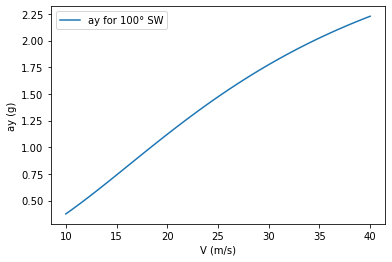

In [133]:
lateral_accel_gain = (V**2/L) / (1 + K*V**2/L)
print()
print(f"{'Lateral acceleration gain':40} = {lateral_accel_gain / rad2deg :.2f} (m/s^2)/°")
print(f"{'':40} = {lateral_accel_gain / rad2deg / g :.3f} g/°")
print()
print(f"{'Lateral acceleration for 100° at the SW':40} = {lateral_accel_gain / rad2deg / g * 100 / osr :.3f} g")


# Let's plot this gain variation with speed
V1 = np.linspace(10, 40, 100)
plt.plot(V1, (V1**2/L) / (1 + K*V1**2/L) / rad2deg / g * 100 / osr, label='ay for 100° SW');
plt.legend();
plt.xlabel('V (m/s)');
plt.ylabel('ay (g)');


### Yaw rate gain 

Yaw rate (aka yaw velocity) is defined by $ r = \frac{V}{R} $ (for readers used to see the yaw angle denoted $ \psi $, the yaw rate is obviously $ \dot \psi $)

We can show that the yaw rate gain, with a unit of 1/s, is $$ \frac{r}{\delta} = \frac{\frac{V}{L}}{1 + K \cdot \frac{V^2}{L}} $$


Yaw rate gain                            = 4.73 s^-1



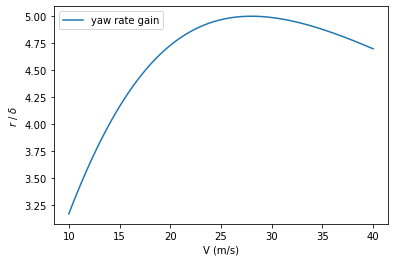

In [134]:
yaw_rate_gain = (V/L) / (1 + K*V**2/L)
print()
print(f"{'Yaw rate gain':40} = {yaw_rate_gain :.2f} s^-1")
print()

# Let's plot this gain variation with speed
V1 = np.linspace(10, 40, 100)
plt.plot(V1, (V1/L) / (1 + K*V1**2/L), label='yaw rate gain');
plt.legend();
plt.xlabel('V (m/s)');
plt.ylabel(r'$r\ /\ \delta$');


We can see that the yaw rate gain goes through a maximum. It can be shown that **the speed for which the gain is maximum is the characteristic speed** defined above. 


### Static margin

We first define the neutral steer point as the point where a lateral perturbation force won't induce any yaw motion.

![bicycle_model_03.png](./images/bicycle_model_03.png)

By writing the equlibrium of yaw moments with respect to the center of gravity we can compute the distance `e` 

$$ e = \frac{a \cdot C_f - b \cdot C_r}{C_f + C_r} $$

The static margin is then computed as being equal to $ \frac{e}{L} $

It is negative when the neutral steer point is located at the rear, and means the vehicle understeers.  
Reminder : static margin < 0 $\leftrightarrow $ understeer gradient > 0

In [135]:
distance_CoG_to_neutral_steer_point = (a*Cf-b*Cr)/(Cf+Cr)
print()
print(f"{'Static margin':40} = {distance_CoG_to_neutral_steer_point/L*100 :.2f} %")



Static margin                            = -17.14 %
